# Ionization rates of Earth and Mars

The ionization rate $q$ at altitude $z$ is, for monoenergetic electrons of energy $E_p$, given by

\begin{equation}
q(z) = F\frac{E_p}{\Delta\varepsilon_{\text{ion}}}\Lambda\left(\frac{s}{R}\right)\frac{\rho(z)}{R(E_p)},
\end{equation}

where $F$ is the electron flux [cm$^{-2}$s$^{-1}$], $\Delta\varepsilon_{\text{ion}}\approx35$ [eV] is the energy loss per electron-ion pair formation, $\Lambda\left(\frac{s}{R}\right)$ is the energy dissipation distribution function, $s$ is the atmospheric scattering depth, $R$ is the energy specific stopping range, and $\rho$ is the atmosphere's total mass density.

The given variables/functions are:
$E_p$, $\Delta\varepsilon_{\text{ion}}$, $F$, and $\Lambda\left(\frac{s}{R}\right)$.

So what we need to do is:

i) calculate $R$ [g/cm$^2$] from the empirical formula
\begin{equation}
R(E)=4.30\times10^{-7}+5.36\times10^{-6}E^{1.67}
\end{equation}
where $E$ is in [keV].

ii) Calculate $\rho(z)$ for the atmospheres based on atmospheric models.

iii) Calculate the scattering depth $s(z)$
\begin{equation}
s(z)=\int_z^\infty \rho(z')dz'
\end{equation}

iv) Use $s$ and $R$ to calculate $\Lambda\left(\frac{s}{R}\right)$

v) Calculate $q(z)$

vi) Plot $q(z)$ for different electron energies.

In [25]:
# Import needed packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


Calculate $R$ using \begin{equation}
R(E)=4.30\times10^{-7}+5.36\times10^{-6}E^{1.67}
\end{equation}

In [26]:
# We look at energies 0.2, 1, 10, and 50 keV.
E=np.array([0.2,1,10,50])
R=4.30*10**(-7)+5.36*10**(-6)*E**(1.67)

Load model of Earth's atmosphere

Text(0.5, 1.0, 'Atmosphere composition - Earth')

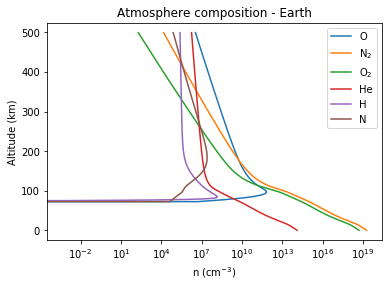

In [27]:
e_height,e_O,e_N2,e_O2,e_He,e_Ar,e_H,e_N = np.genfromtxt("earth_data.txt", unpack=True, skip_header=1)
# Plot number densities (ignoring Argon because negligible amount)
plt.figure() 
plt.semilogx(e_O,e_height)
plt.semilogx(e_N2,e_height)
plt.semilogx(e_O2,e_height)
plt.semilogx(e_He,e_height)
plt.semilogx(e_H,e_height)
plt.semilogx(e_N,e_height)

plt.xlabel("n (cm$^{-3}$)")
plt.ylabel("Altitude (km)")
plt.legend(["O","N$_2$","O$_2$","He","H","N"])
plt.title('Atmosphere composition - Earth')


Generate martian atmosphere.
Following the empirical fomula of Nier and McElroy (1977), we calculate the number density $n$ [cm$^{-3}$]of atom/molecule species $s$ as
\begin{equation}
n_s = 10^{b_s z + a_s}
\end{equation}

In [28]:
#Since we solve the same equation for all species, we define the class:
class Species(object):
    """
    Class for treating atmospheric composition of a simple model.
    
    Input: a, b, height
    where a and b are coefficients relating the number density and altitude
    according to the formula: n(z)=10^(b*z+a). z is either a scalar or a 1D-array
    of heights where one wishes to evaluate the density.
    
    Method: calc_n() calculates the density given a, b, z, and stores the result
    in self.n (Yes this is not really necessary, but I wanted to implement a method for the sake of it.)
            plot_n() Plots the density.
    """
    def __init__(self,a,b,height):
        self.a = a
        self.b = b
        self.z = height
    
    def calc_n(self):
        self.n = 10**(self.b*self.z+self.a)
        
    def plot_n(self):
        plt.figure() 
        plt.semilogx(self.n,self.z)
        plt.xlabel('Density [cm$^{-3}$]')
        plt.ylabel('Altitude [km]')

Text(0.5, 1.0, 'Atmosphere composition - Mars')

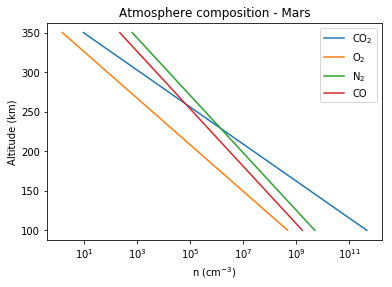

In [29]:
# Number density coefficients from Nier and McElroy (1977).
b_CO2=-0.042696;
b_O2=-0.033945;
b_N2=-0.027514;
b_CO=-0.027514;

a_CO2=15.930;
a_O2=12.074;
a_N2=12.452;
a_CO=11.984;
# Altitudes to evaluate the density
z=np.linspace(100,350,501)

# Set up the molecular species
mars_co2 = Species(a_CO2,b_CO2,z)
mars_o2 = Species(a_O2,b_O2,z)
mars_n2 = Species(a_N2,b_N2,z)
mars_co = Species(a_CO,b_CO,z)

# Calculate their number densities against height
mars_co2.calc_n()
mars_o2.calc_n()
mars_n2.calc_n()
mars_co.calc_n()

# Plot number densities
plt.figure() 
plt.semilogx(mars_co2.n,mars_co2.z)
plt.semilogx(mars_o2.n,mars_co2.z)
plt.semilogx(mars_n2.n,mars_co2.z)
plt.semilogx(mars_co.n,mars_co2.z)
plt.xlabel("n (cm$^{-3}$)")
plt.ylabel("Altitude (km)")
plt.legend(["CO$_2$","O$_2$","N$_2$","CO"])
plt.title("Atmosphere composition - Mars")

Calculate atmospheric mass density $\rho(z)$ for both planets.
\begin{equation}
\rho(z)=\sum_s n_s(z)m_s
\end{equation}

In [30]:
#Define molecular masses in [amu]
mO=16
mCO=12+16
mCO2=12+16*2
mN=14
mN2=14*2
mO2=2*16
mHe=4
mH=1


# Conversion factor between amu and gram
amu2g=1.66053904*10**(-24); #1 [g]= 1[amu]*amu2g

#Earth: 
rho_Earth = amu2g*(e_O*mO+e_N2*mN2+e_O2*mO2+e_H*mH+e_N*mN)
#Mars:
rho_Mars = amu2g*(mars_co2.n*mCO2+mars_co.n*mCO+mars_n2.n*mN2+mars_o2.n*mO2)



Calcluate atmospheric scattering depth, $s(z)$
\begin{equation}
s(z)=\int_z^\infty \rho(z')dz'
\end{equation}

Text(0, 0.5, 'Altitude (km)')

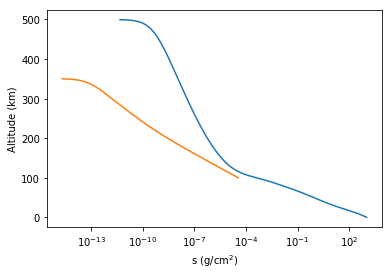

In [31]:
dz_Earth=(e_height[1]-e_height[0]) *10**5 #In [cm]
dz_Mars = (z[1]-z[0]) * 10**5 #[cm]

#Computing the integral as a sum
#Since we evaluate from z to inf, cumsum gives the 
#desired results after some extra step.
si_Earth = np.cumsum(rho_Earth[::-1]) * dz_Earth
s_Earth=si_Earth[::-1]
si_Mars = np.cumsum(rho_Mars[::-1]) * dz_Mars
s_Mars = si_Mars[::-1]

# Plot to check that it looks ok (which it does)
plt.semilogx(s_Earth,e_height)
plt.semilogx(s_Mars,z)
plt.xlabel('s (g/cm$^2$)')
plt.ylabel('Altitude (km)')

Now we have $s(z)$ and $R$, so we can import the function $\Lambda\left(\frac{s}{R}\right)$ and evaluate it

In [32]:
# Calculate the s/R ratio:
sR_Earth = s_Earth[:,np.newaxis] / R
sR_Mars = s_Mars[:,np.newaxis] / R

# Import numerical representation of Lambda
unisR,uniLambda=np.genfromtxt("Energy_deposition_unidirectional.txt", unpack=True)
# Plot to confirm that it works.
#plt.plot(unisR,uniLambda)
#plt.xlabel('$\Lambda(s/R)$')
#plt.ylabel('z (km)')

# interp1d only interpolates within the given interval, so we add
# an extra point far away (larger than max(sR)) with value 0.
# We also set the last value of lambda as 0.
uniLambda[-1]=0
uniLambda=np.append(uniLambda,0)
unisR=np.append(unisR,10**11)

# Now we need to interpolate the numerical Lambda to our values of s/R.
from scipy.interpolate import interp1d
lambda_func = interp1d(unisR, uniLambda)

unisR.shape
lambda_Earth=np.empty(sR_Earth.shape)
lambda_Mars=np.empty(sR_Mars.shape)

# Do interpolation for the four energy values
# to evaluate Lambda(s/R) for our values of s/R)
for iR in range(4):
    lambda_Earth[:,iR] = lambda_func(sR_Earth[:,iR])
    lambda_Mars[:,iR] = lambda_func(sR_Mars[:,iR])



We can now calculate the ionization rate $q(z)$ is given by
\begin{equation}
q(z) = F\frac{E_p}{\Delta\varepsilon_{\text{ion}}}\Lambda\left(\frac{s}{R}\right)\frac{\rho(z)}{R(E_p)},
\end{equation}


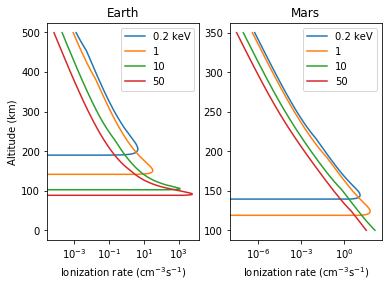

In [33]:
F = 10**8 #electrons per (second and cm^2)
deps = 35.0*10**-3 #keV

q_Earth = F*E[np.newaxis,:]*lambda_Earth*rho_Earth[:,np.newaxis]/R[np.newaxis,:]
q_Mars = F*E[np.newaxis,:]*lambda_Mars*rho_Mars[:,np.newaxis]/R[np.newaxis,:]

plt.subplot(121)
plt.semilogx(q_Earth,e_height)
plt.xlabel('Ionization rate (cm$^{-3}$s$^{-1}$)')
plt.ylabel('Altitude (km)')
plt.legend(['0.2 keV','1','10','50'])
plt.title('Earth')
plt.subplot(122)
plt.semilogx(q_Mars,z)
plt.xlabel('Ionization rate (cm$^{-3}$s$^{-1}$)')
plt.legend(['0.2 keV','1','10','50'])
plt.title('Mars')
#Try to save plot
plt.savefig('ionization_rates.pdf')